In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import  PartialDependenceDisplay,permutation_importance
from sklearn.linear_model import LinearRegression, LogisticRegression
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn import tree
import seaborn as sns
import numpy as np
%matplotlib inline

# Load the dataset
data = pd.read_csv('day.csv')

# Select relevant features and target
features = ['hum','temp', 'windspeed', 'season', 'weekday']
target = 'cnt'
X = data.loc[:,'season':'windspeed']
y = data['cnt']  # Target is count of bike rentals

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test_scaled= pd.DataFrame(scaler.transform(X_test), columns=X.columns)

rf_clf = RandomForestClassifier(max_depth=4)
rf_clf.fit(X_train_scaled[features], y_train>=y_train.median())

rf_reg = RandomForestRegressor(max_depth=4)
rf_reg.fit(X_train_scaled[features], y_train)

RandomForestRegressor(max_depth=4)

Text(0.5, 0.98, 'PDP and ICE for Temp and Hum')

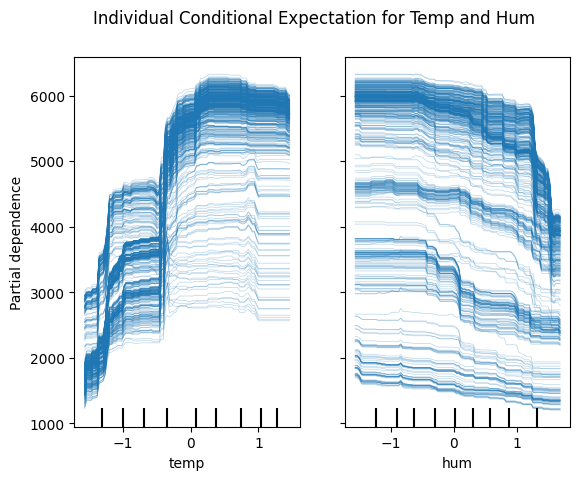

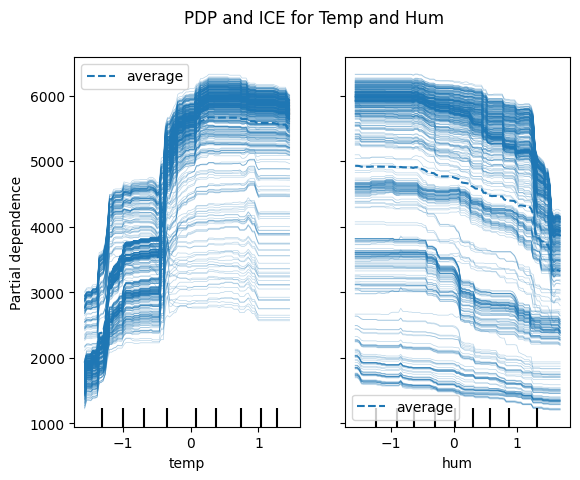

In [2]:
features_to_plot = ["temp", "hum"]
PartialDependenceDisplay.from_estimator(rf_reg, X_train_scaled[features], features_to_plot, kind='individual',  # Shows individual lines
    centered=False)     # Number of instances to plot (use smaller number for clarity)
plt.suptitle("Individual Conditional Expectation for Temp and Hum")

PartialDependenceDisplay.from_estimator(rf_reg, X_train_scaled[features], features_to_plot, kind='both',  # Shows individual lines
    centered=False)     # Number of instances to plot (use smaller number for clarity)
plt.suptitle("PDP and ICE for Temp and Hum")

Text(0.5, 0.98, 'ICE Plots for Windspeed and Hum')

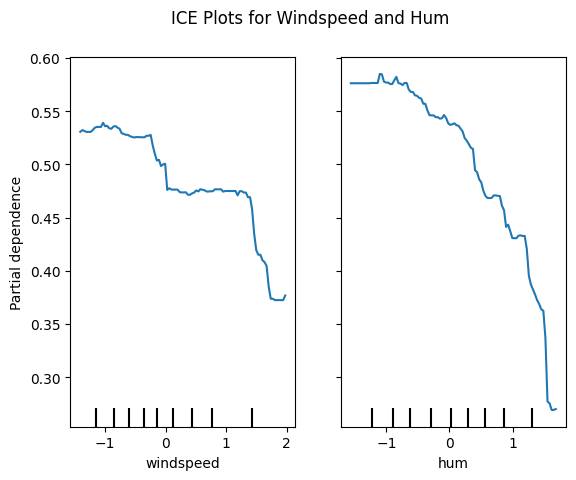

In [3]:
features_to_plot = ['windspeed', 'hum']
PartialDependenceDisplay.from_estimator(rf_clf, X_train_scaled[features], features_to_plot)
kind='individual'
plt.suptitle('ICE Plots for Windspeed and Hum')

Text(0.5, 0.98, 'PDP and ICE Overlap')

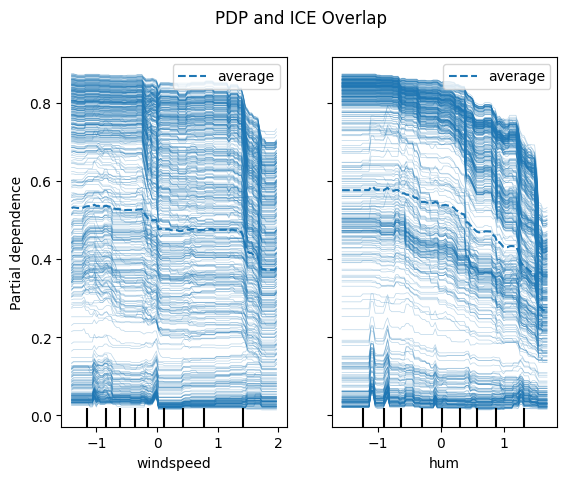

In [4]:
features_to_plot = ['windspeed', 'hum']
PartialDependenceDisplay.from_estimator(rf_clf, X_train_scaled[features], features_to_plot, kind='both',  
    centered=False)    
plt.suptitle('PDP and ICE Overlap')

Text(0.5, 0.98, 'ICE and PDP Overlap for more features')

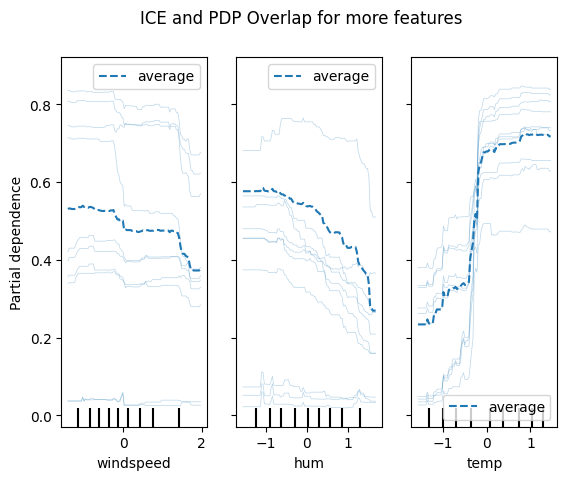

In [5]:
features_to_plot = ['windspeed', 'hum', 'temp']
PartialDependenceDisplay.from_estimator(rf_clf, X_train_scaled[features], features_to_plot, kind='both',  
    centered=False, subsample=10)    
plt.suptitle('ICE and PDP Overlap for more features')